In [2]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import seaborn as sns

In [2]:
# Define the path to the directory containing subject folders
base_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs'
fig_dir = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/figures'

# To plot mean SCR Amplitude for all subjects across all sessions

In [4]:
sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
session_means = {}
folder_names = ['sub-1', 'sub-2', 'sub-3', 'sub-4', 'sub-5', 'sub-6', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']

# Change to 1 to save figures to fig_dir
save_figs = 0

        session1  session2  session3  session4  session5a  session5b
sub-1   0.010503  0.003853  0.004949  0.003526   0.008382   0.006278
sub-2   0.001018  0.000082  0.000093  0.001711   0.000096   0.000094
sub-3   0.002554  0.002505  0.004169  0.003497   0.003077   0.003029
sub-4   0.000104  0.000626  0.000419  0.000108   0.000069   0.000131
sub-6   0.008757  0.000090  0.000094  0.001128   0.002512   0.003878
sub-7   0.000211  0.000066       NaN       NaN   0.000468   0.000868
sub-8   0.000095  0.000082       NaN  0.000084   0.001939   0.000771
sub-9   0.000107  0.000936  0.000094  0.004215   0.000095   0.000098
sub-10  0.000105  0.000095  0.000085  0.000101   0.006052   0.004220
sub-11  0.000117  0.000104  0.000088  0.000520   0.000067   0.000059


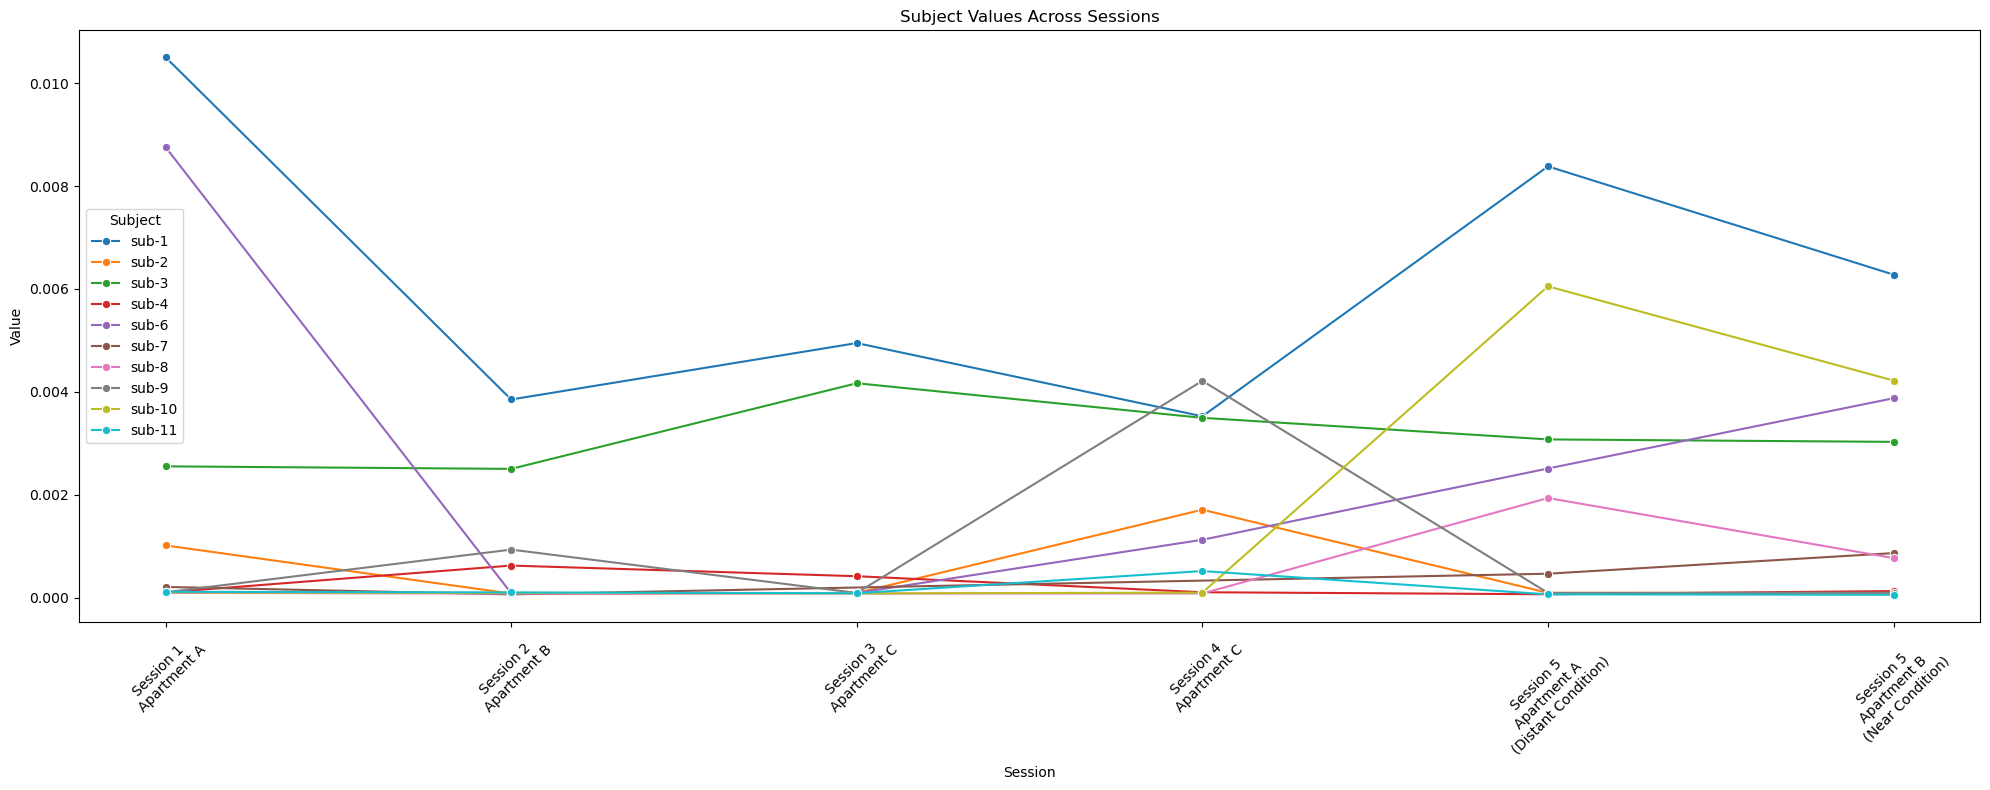

In [29]:
# To plot mean SCR Amplitude for all subjects across all sessions

for session_file, session_name in zip(sessions, session_names):
    session_means[session_name] = []

    # Loop through subjects
    for sub_dir in folder_names:
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)
            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                mean_SCR_Amp = df_session['SCR_Amplitude'].mean()
                session_means[session_name].append([sub_dir, mean_SCR_Amp])
    # session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

sessions_mean_new = {}
# Loop through each session and each subject in that session
for session, value_for_all_subjects in session_means.items():
    for subject, mean in value_for_all_subjects:
        if subject not in sessions_mean_new:
            sessions_mean_new[subject] = []
        sessions_mean_new[subject].append([session, mean])

#Assigning session and it's corresponding data to each Subject
df_data = {}
for subject, session_data in sessions_mean_new.items():
    df_data[subject] = {session: value for session, value in session_data}

    
# Convert to DataFrame and transpose to have subjects as rows and sessions as columns
df = pd.DataFrame(df_data).transpose()
# Print dataframe as table
print(df)


# Reset index to have 'Subject' as a column for plotting purposes
df.reset_index(inplace=True)
df.rename(columns={'index': 'Subject'}, inplace=True)

# Melt the DataFrame for seaborn compatibility
df_melted = df.melt(id_vars=['Subject'], var_name='Session', value_name='Value')

# Plotting with seaborn
plt.figure(figsize=(20, 8))
sns.lineplot(data=df_melted, x='Session', y='Value', hue='Subject', marker='o')

# Custom labels for the x-axis
labels = [
    'Session 1 \n Apartment A', 
    'Session 2\n Apartment B', 
    'Session 3\n Apartment C', 
    'Session 4\n Apartment C', 
    'Session 5\n Apartment A \n (Distant Condition)',
    'Session 5\n Apartment B \n (Near Condition)'
]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

# Labels and title
plt.xlabel('Session')
plt.ylabel('Value')
plt.title('Subject Values Across Sessions')
plt.tight_layout()
#plt.show()

if save_figs == 1:
    plt.savefig(f"{fig_dir}/Mean SCR Amplitude.png", dpi=300, bbox_inches='tight')  


## To plot mean SCR Amplitude for all subjects across session 1 

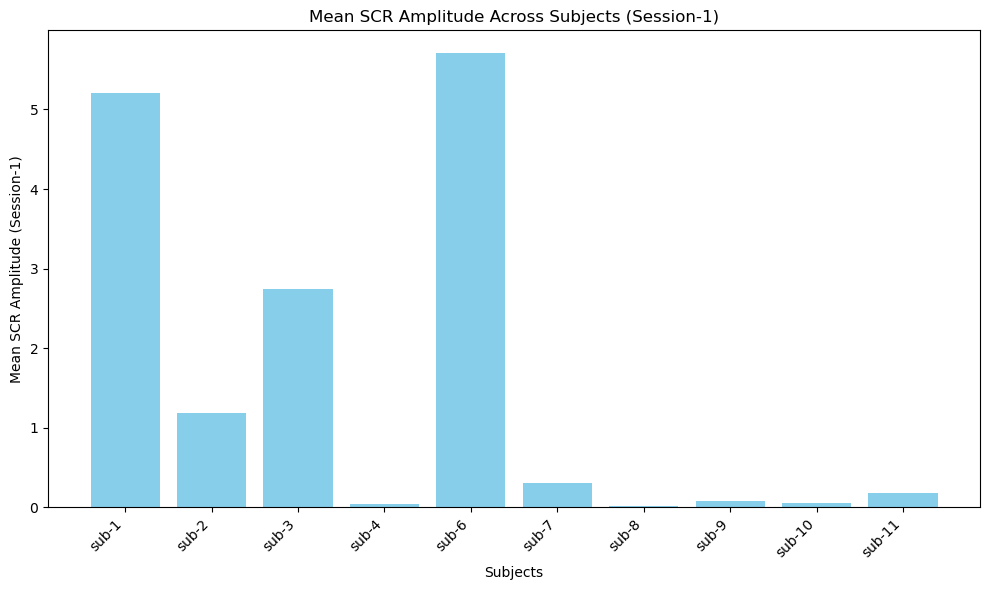

In [30]:


# Initialize dictionary to store session-1 mean SCR Amplitude for each subject
session_1_means = {}

# Loop through subjects
for sub_dir in folder_names:
    sub_path = os.path.join(base_dir, sub_dir)
    if os.path.isdir(sub_path):
        session_1_path = os.path.join(sub_path, sessions[0])  # Access only session-1.csv
        if os.path.exists(session_1_path):
            try:
                df_session_1 = pd.read_csv(session_1_path)
                mean_SCR_Amp = df_session_1['EDA_Tonic'].mean()
                session_1_means[sub_dir] = mean_SCR_Amp
            except Exception as e:  # Handle potential errors
                print(f"Error processing file {session_1_path}: {e}")

# Create a pandas Series from the dictionary for plotting
subjects = list(session_1_means.keys())
mean_values = list(session_1_means.values())
df_data = pd.Series(mean_values, index=subjects)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_data.index, df_data.values, color='skyblue')

# Set labels and title
plt.xlabel('Subjects')
plt.ylabel('Mean SCR Amplitude (Session-1)')
plt.title('Mean SCR Amplitude Across Subjects (Session-1)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

# Show or save the plot
if save_figs == 1:
    plt.savefig(f"{fig_dir}/Mean_SCR_Amplitude_Session_1.png", dpi=300, bbox_inches='tight')
else:
    plt.show()


## Mean Amplitude based on the order of Apartment observed 

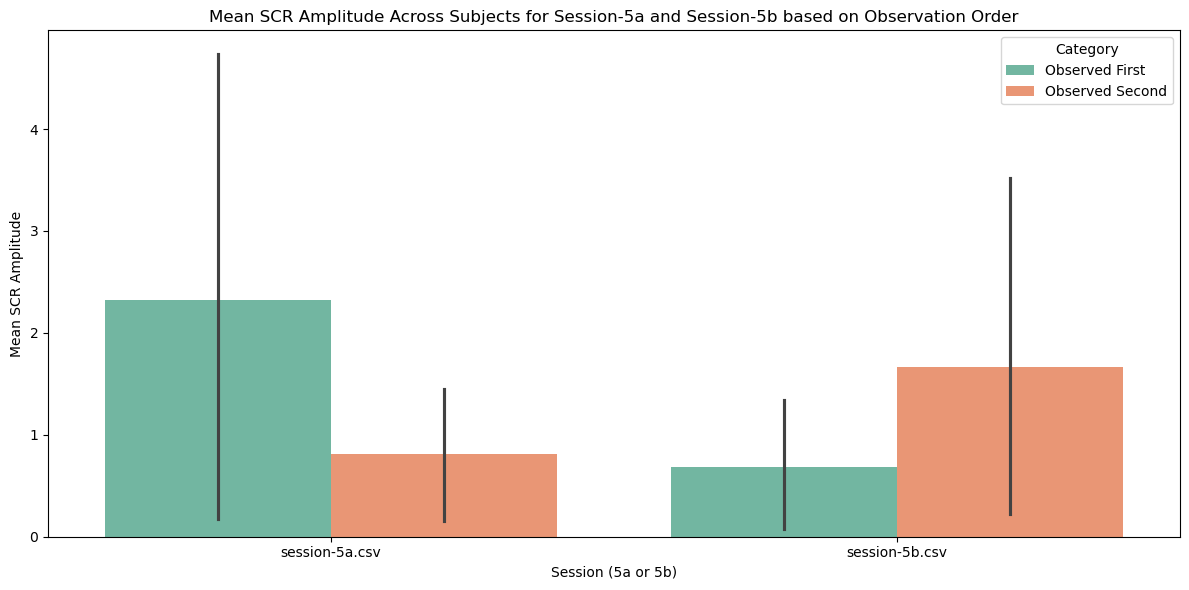

In [31]:

sessions = ['session-5a.csv', 'session-5b.csv']  # Specify the sessions you want to compare
folder_names = [f'sub-{i}' for i in range(1, 12)]  # Adjusted to cover sub-1 to sub-11

# Define apartment categories based on subject folders
apartment_categories = {
    'session-5a.csv': {
        'sub-1': 'Observed First',
        'sub-2': 'Observed First',
        'sub-3': 'Observed First',
        'sub-4': 'Observed Second',
        'sub-5': 'Observed First',
        'sub-6': 'Observed Second',
        'sub-7': 'Observed First',
        'sub-8': 'Observed Second',
        'sub-9': 'Observed Second',
        'sub-10': 'Observed Second',
        'sub-11': 'Observed First',
    },
    'session-5b.csv': {
        'sub-1': 'Observed Second',
        'sub-2': 'Observed Second',
        'sub-3': 'Observed Second',
        'sub-4': 'Observed First',
        'sub-5': 'Observed Second',
        'sub-6': 'Observed First',
        'sub-7': 'Observed Second',
        'sub-8': 'Observed First',
        'sub-9': 'Observed First',
        'sub-10': 'Observed First',
        'sub-11': 'Observed Second',
    }
}

# Initialize dictionary to store mean SCR Amplitude for each session and subject
session_means = {session: {} for session in sessions}

# Loop through subjects
for sub_dir in folder_names:
    sub_path = os.path.join(base_dir, sub_dir)
    if os.path.isdir(sub_path):
        for session in sessions:
            session_path = os.path.join(sub_path, session)
            if os.path.exists(session_path):
                try:
                    df_session = pd.read_csv(session_path)
                    mean_SCR_Amp = df_session['EDA_Tonic'].mean()
                    session_means[session][sub_dir] = mean_SCR_Amp
                except Exception as e:  # Handle potential errors
                    print(f"Error processing file {session_path}: {e}")

# Create a DataFrame for plotting
data_to_plot = []
for session in sessions:
    for subject, mean_value in session_means[session].items():
        data_to_plot.append({
            'Subject': subject,
            'Mean_SCR_Amp': mean_value,
            'Session': session,
            'Category': apartment_categories[session][subject]
        })

df_data = pd.DataFrame(data_to_plot)

# Create the grouped bar graph with session on the x-axis and category (observed first/second) as hue
plt.figure(figsize=(12, 6))
sns.barplot(data=df_data, x='Session', y='Mean_SCR_Amp', hue='Category', palette='Set2')

# Set labels and title
plt.xlabel('Session (5a or 5b)')
plt.ylabel('Mean SCR Amplitude')
plt.title('Mean SCR Amplitude Across Subjects for Session-5a and Session-5b based on Observation Order')
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for readability
plt.tight_layout()

# Show or save the plot
if save_figs == 1:
    plt.savefig(f"{fig_dir}/Mean_SCR_Amplitude_Sessions_Categories.png", dpi=300, bbox_inches='tight')
else:
    plt.show()


## To plot sum of SCR Peaks for all subjects across all sessions

In [33]:
# To plot sum of SCR Peaks for all subjects across all sessions
sessions = ['session-1.csv', 'session-2.csv', 'session-3.csv', 'session-4.csv', 'session-5a.csv', 'session-5b.csv']
session_names = ['session1', 'session2', 'session3', 'session4', 'session5a', 'session5b']
folder_names = ['sub-1', 'sub-2', 'sub-3', 'sub-4', 'sub-5', 'sub-6', 'sub-7', 'sub-8', 'sub-9', 'sub-10', 'sub-11']
session_sums = {}
for session_file, session_name in zip(sessions, session_names):
    session_sums[session_name] = []

    # Loop through subjects
    for sub_dir in folder_names:
        sub_path = os.path.join(base_dir, sub_dir)
        if os.path.isdir(sub_path):
            session_path = os.path.join(sub_path, session_file)
            if os.path.exists(session_path):
                df_session = pd.read_csv(session_path)
                sum_SCR_Amp = df_session['SCR_Peaks'].sum()
                session_sums[session_name].append([sub_dir, sum_SCR_Amp])
    # session_means[session_name] = pd.DataFrame(session_means[session_name], columns=['subject', 'mean_SCR_Amp'])

sessions_sum_new = {}
# Loop through each session and each subject in that session
for session, value_for_all_subjects in session_sums.items():
    for subject, sum in value_for_all_subjects:
        if subject not in sessions_sum_new:
            sessions_sum_new[subject] = []
        sessions_sum_new[subject].append([session, sum])

# Print dictionary
# print(sessions_mean_new)

df_data = {}
for subject, session_data in sessions_sum_new.items():
    df_data[subject] = {session: value for session, value in session_data}
# Convert to DataFrame and transpose to have subjects as rows and sessions as columns
df = pd.DataFrame(df_data).transpose()
# Print dataframe as table
print(df)


        session1  session2  session3  session4  session5a  session5b
sub-1       56.0      34.0      54.0      35.0       54.0       43.0
sub-2       73.0     208.0     171.0      46.0      127.0      111.0
sub-3       58.0      71.0      59.0      67.0       59.0       56.0
sub-4      192.0      35.0      32.0     201.0       92.0      176.0
sub-6       61.0     184.0     192.0       9.0       36.0       53.0
sub-7       47.0      91.0       NaN       NaN       52.0       66.0
sub-8      142.0     171.0       NaN     116.0       44.0       25.0
sub-9      198.0      17.0     179.0      45.0      155.0      160.0
sub-10     159.0     189.0     133.0     188.0       51.0       53.0
sub-11      50.0     109.0       9.0       9.0       29.0       51.0


In [36]:
import os
import pandas as pd

# Path to the main folder containing subfolders for each subject
main_folder = 'subject.csvs'

# Dictionary to store SCR_Amplitude values for each subject and session
subject_data = {}

# Traverse the main folder
for subject_folder in os.listdir(base_dir):
    subject_path = os.path.join(base_dir, subject_folder)
    
    # Ensure it's a folder (ignore files in the main folder)
    if os.path.isdir(subject_path):
        # Dictionary to store SCR_Amplitude values for each session
        session_data = {}

        # Traverse the session files in each subject folder
        for session_file in os.listdir(subject_path):
            if session_file.endswith('.csv'):
                session_path = os.path.join(subject_path, session_file)
                
                # Read the CSV file
                df = pd.read_csv(session_path)
                
                # Extract SCR_Amplitude where SCR_Peaks == 1
                amplitude_values = df.loc[df['SCR_Peaks'] == 1, 'SCR_Amplitude'].tolist()

                # Save the values for the session
                session_data[session_file] = amplitude_values
        
        # Save the data for the subject
        subject_data[subject_folder] = session_data

# At this point, 'subject_data' contains the SCR_Amplitude values for each subject and session
print(subject_data)

# If you'd like to save the results to a CSV or JSON, you can use the following code
# Example: Save as JSON
#import json
#with open('scr_amplitude_data.json', 'w') as f:
#    json.dump(subject_data, f, indent=4)


{'sub-6': {'session-2.csv': [0.0005495211879229, 3.434902760617725e-05, 0.0005522927556089, 0.0001821548543859, 0.0012756619399712, 0.0004193726147808, 0.001050445311093, 0.0010223031953794, 0.0017734033467032, 0.0003288218360184, 0.0006772997079225, 0.0012983111944854, 0.0001150411745637, 0.0004799690948497, 0.0010839308795162, 0.0003799528259577, 0.0003986300164308, 0.0016879497251902, 0.0004544197668272, 0.0009559929516428, 0.0008229187595957, 0.000444107614896, 0.0002321578881858, 0.0006972241803036, 0.0019529380555114, 0.0002482031101263, 0.0015092304699064, 0.0002004611406077, 0.0019617960204095, 0.0006292975354458, 0.0003909278684575, 0.0004328301913247, 0.0007570640613993, 0.0011871377534554, 0.0006921673072457, 0.0007394611757853, 0.0005829090305462, 0.0007982897484417, 0.0006828588681009, 0.0011844178323393, 0.0007685907884026, 0.000512278383679, 0.0009095988186821, 0.0010174110703469, 0.0016972346773634, 0.0001476768760822, 0.0009016402890779, 0.0006422743220185, 0.000888212

In [45]:
import os
import pandas as pd

# Path to the main folder containing subfolders for each subject
main_folder = 'subject.csvs'

# Dictionary to store SCR_Amplitude values for each subject and session
subject_data = {}

# Traverse the main folder
for subject_folder in sorted(os.listdir(base_dir)):
    subject_path = os.path.join(base_dir, subject_folder)
    
    # Ensure it's a folder (ignore files in the main folder)
    if os.path.isdir(subject_path):
        # Dictionary to store SCR_Amplitude values for each session
        session_data = {}

        # Traverse the session files in each subject folder
        for session_file in sorted(os.listdir(subject_path)):
            if session_file.endswith('.csv'):
                session_path = os.path.join(subject_path, session_file)
                
                # Read the CSV file
                df = pd.read_csv(session_path)
                
                # Extract SCR_Amplitude where SCR_Peaks == 1
                amplitude_values = df.loc[df['SCR_Peaks'] == 1, 'SCR_Amplitude'].tolist()

                # Save the values for the session
                session_data[session_file] = amplitude_values
        
        # Save the data for the subject
        subject_data[subject_folder] = session_data



# Output preparation: organize data into a tabular format for each subject
for subject, sessions in subject_data.items():
    print(f"Subject: {subject}")

    # Create a DataFrame to ensure proper alignment
    df_output = pd.DataFrame.from_dict(sessions, orient='index').T

    # Print session names (as column headers)
    print("\t".join(df_output.columns))

    # Print the SCR_Amplitude values aligned under the session names
    for row in df_output.itertuples(index=False, name=None):
        print("\t".join(str(x) if pd.notna(x) else "" for x in row))
    
    print("-" * 50)  # Divider between subjects

Subject: sub-1
session-1.csv	session-2.csv	session-3.csv	session-4.csv	session-5a.csv	session-5b.csv
0.2825857616737883	0.0415566591945112	0.281921984664046	0.0446935187293365	0.2413937341121707	0.1213989850462677
0.371064070109965	0.252481871606108	0.2250506982195231	0.0988959776850538	0.6774791808158875	0.3659726565605026
0.3290196476597968	0.1384653978707523	0.3162772358846866	0.0661285112285279	0.0092015235856537	0.2914054077429791
0.492773043850665	0.3747414451932834	0.0524863827289137	0.1574487433707602	0.4311089668996147	0.1135823640881322
0.380170302301698	0.2951116335033904	0.0488114104697874	0.2165287622745625	0.4652471778213337	0.3754666559264502
0.3699212100328492	0.274406098823729	0.221528556768767	0.3681664740778246	0.5241694494285978	0.1785166034634657
0.5608625794639648	0.1324710721128772	0.3984204852897768	0.0995154740410954	0.1148286651767343	0.0368771272830495
0.2523779175876651	0.2324167467903569	0.133549541616496	0.2021567183994921	0.339233049059552	0.1800235969227

In [7]:
import os
import pandas as pd

# Path to the main folder containing subfolders for each subject
main_folder = 'subject.csvs'

# Dictionary to store the mean SCR_Amplitude values for each subject and session
subject_mean_data = {}

# Traverse the main folder
for subject_folder in sorted(os.listdir(base_dir)):
    subject_path = os.path.join(base_dir, subject_folder)
    
    # Ensure it's a folder (ignore files in the main folder)
    if os.path.isdir(subject_path):
        # Dictionary to store mean SCR_Amplitude values for each session
        session_mean_data = {}

        # Traverse the session files in each subject folder
        for session_file in sorted(os.listdir(subject_path)):
            if session_file.endswith('.csv'):
                session_path = os.path.join(subject_path, session_file)
                
                # Read the CSV file
                df = pd.read_csv(session_path)
                
                # Calculate the mean SCR_Amplitude where SCR_Peaks == 1
                  mean_SCR_Amp = df.loc[(df['SCR_Peaks'] == 1) & (df['SCR_Height'] > 0.02), 'SCR_Height'].mean()


                # Save the mean value for the session
                session_mean_data[session_file] = mean_SCR_Amp
        
        # Save the mean data for the subject
        subject_mean_data[subject_folder] = session_mean_data

# Print the mean SCR_Amplitude values for each subject and session
for subject, sessions in subject_mean_data.items():
    print(f"Subject: {subject}")
    for session, mean_value in sessions.items():
        print(f"  Session: {session}, Mean SCR_Amplitude: {mean_value}")
    print("-" * 50)  # Divider between subjects

# If you'd like to save the results to a CSV or JSON, you can use the following code
# Example: Save as JSON
# import json
# with open('scr_mean_amplitude_data.json', 'w') as f:
#     json.dump(subject_mean_data, f, indent=4)


IndentationError: unexpected indent (3633995969.py, line 28)

In [3]:
import os
import pandas as pd

# Path to the main folder containing subfolders for each subject
main_folder = 'subject.csvs'

# Dictionary to store the mean SCR_Amplitude values for each subject and session
subject_mean_data = {}

# Traverse the main folder
for subject_folder in sorted(os.listdir(base_dir)):
    subject_path = os.path.join(base_dir, subject_folder)
    
    # Ensure it's a folder (ignore files in the main folder)
    if os.path.isdir(subject_path):
        # Dictionary to store mean SCR_Amplitude values for each session
        session_mean_data = {}

        # Traverse the session files in each subject folder
        for session_file in sorted(os.listdir(subject_path)):
            if session_file.endswith('.csv'):
                session_path = os.path.join(subject_path, session_file)
                
                # Read the CSV file
                df = pd.read_csv(session_path)
                
                # Calculate the mean SCR_Height where SCR_Peaks == 1 and SCR_Height > 0.02
                mean_SCR_Amp = df.loc[(df['SCR_Peaks'] == 1) & (df['EDA_Clean'] > 0.02), 'EDA_Clean'].mean()

                # Save the mean value for the session
                session_mean_data[session_file] = mean_SCR_Amp
        
        # Save the mean data for the subject
        subject_mean_data[subject_folder] = session_mean_data

# Print the mean SCR_Amplitude values for each subject and session
for subject, sessions in subject_mean_data.items():
    print(f"Subject: {subject}")
    for session, mean_value in sessions.items():
        print(f"  Session: {session}, Mean SCR_Height: {mean_value}")
    print("-" * 50)  # Divider between subjects


Subject: sub-1
  Session: session-1.csv, Mean SCR_Height: 5.449267310755594
  Session: session-2.csv, Mean SCR_Height: 1.56311797394472
  Session: session-3.csv, Mean SCR_Height: 2.9776979964456447
  Session: session-4.csv, Mean SCR_Height: 1.600256627514249
  Session: session-5a.csv, Mean SCR_Height: 6.3814901540308835
  Session: session-5b.csv, Mean SCR_Height: 5.205134890800299
--------------------------------------------------
Subject: sub-10
  Session: session-1.csv, Mean SCR_Height: 0.06066200860328891
  Session: session-2.csv, Mean SCR_Height: 0.058032066083301276
  Session: session-3.csv, Mean SCR_Height: 0.03177500972734353
  Session: session-4.csv, Mean SCR_Height: 0.04347237260972561
  Session: session-5a.csv, Mean SCR_Height: 1.6940009329054093
  Session: session-5b.csv, Mean SCR_Height: 1.453858738425393
--------------------------------------------------
Subject: sub-11
  Session: session-1.csv, Mean SCR_Height: 0.1834743511676788
  Session: session-2.csv, Mean SCR_Height:

In [5]:
import os
import pandas as pd

# Path to the main folder containing subfolders for each subject
main_folder = '/Users/dhwanishah/Desktop/MS/VR-Dhwani/subject-csvs-hr'

# Dictionary to store the mean SCR_Amplitude values for each subject and session
subject_mean_data = {}

# Traverse the main folder
for subject_folder in sorted(os.listdir(main_folder)):
    subject_path = os.path.join(main_folder, subject_folder)
    
    # Ensure it's a folder (ignore files in the main folder)
    if os.path.isdir(subject_path):
        # Dictionary to store mean SCR_Amplitude values for each session
        session_mean_data = {}

        # Traverse the session files in each subject folder
        for session_file in sorted(os.listdir(subject_path)):
            if session_file.endswith('.csv'):
                session_path = os.path.join(subject_path, session_file)
                
                # Read the CSV file
                df = pd.read_csv(session_path)
                
                # Calculate the mean SCR_Height where SCR_Peaks == 1 and SCR_Height > 0.02
                mean_SCR_Amp = df.loc[(df['PPG_Peaks'] == 1), 'PPG_Rate'].mean()

                # Save the mean value for the session
                session_mean_data[session_file] = mean_SCR_Amp
        
        # Save the mean data for the subject
        subject_mean_data[subject_folder] = session_mean_data

# Print the mean SCR_Amplitude values for each subject and session
for subject, sessions in subject_mean_data.items():
    print(f"Subject: {subject}")
    for session, mean_value in sessions.items():
        print(f"  Session: {session}, Mean HR: {mean_value}")
    print("-" * 50)  # Divider between subjects


Subject: sub-1
  Session: session-1.csv, Mean HR: 38.32795894115582
  Session: session-2.csv, Mean HR: 22.331272088896363
  Session: session-3.csv, Mean HR: 31.13664472677145
  Session: session-4.csv, Mean HR: 21.624913036902434
  Session: session-5a.csv, Mean HR: 34.421269787692296
  Session: session-5b.csv, Mean HR: 51.09456312435365
--------------------------------------------------
Subject: sub-10
  Session: session-1.csv, Mean HR: 43.33047888754988
  Session: session-2.csv, Mean HR: 45.56636035819056
  Session: session-3.csv, Mean HR: 50.71638963735427
  Session: session-4.csv, Mean HR: 35.203980412339696
  Session: session-5a.csv, Mean HR: 57.43222946686953
  Session: session-5b.csv, Mean HR: 59.14676633113967
--------------------------------------------------
Subject: sub-11
  Session: session-1.csv, Mean HR: 19.8705731034958
  Session: session-2.csv, Mean HR: 26.140816527491772
  Session: session-3.csv, Mean HR: 25.385591812349627
  Session: session-4.csv, Mean HR: 23.984673981